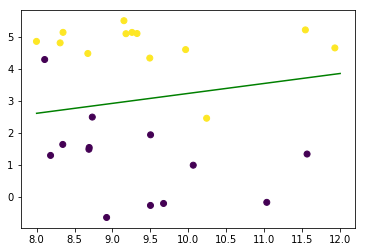

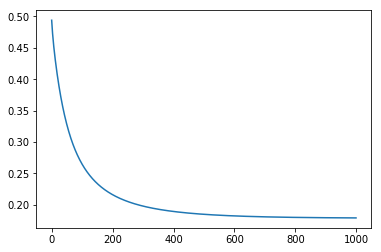

In [2]:
# 梯度下降法实现逻辑回归
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import warnings

warnings.filterwarnings('ignore')

x, y = mglearn.datasets.make_forge()

x = np.hstack((np.ones((len(x), 1)), x))

plt.scatter(x[:, 1], x[:, 2], c=y)

y = y.reshape(-1, 1)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def loss_function(x, y, w, m):
    left = np.multiply(y, np.log(sigmoid(np.matmul(x, w)))).sum()
    right = np.multiply((1 - y), np.log(sigmoid(1 - np.matmul(x, w)))).sum()
    return -(left + right) / m

def gradient_Descent(x, y):
    epoch = 1000
    learning_rate = 0.01
    m, n = x.shape
    w = np.zeros((n, 1))
    loss = []
    for i in range(epoch):
        w_grad = (np.matmul(x.T, (sigmoid(np.matmul(x, w)) - y)))/m
        w = w - learning_rate*w_grad
        loss.append(loss_function(x, y, w, m))
    return w, loss

w, loss = gradient_Descent(x, y)

x_test = np.linspace(8, 12, 100).reshape(-1, 1)
plt.plot(x_test, (-w[1]*x_test-w[0])/w[2], c='g')
plt.show()

plt.plot(range(1000), loss)
plt.show()

accuracy:  0.9440559440559441
roc_auc_score:  0.9444786535303776


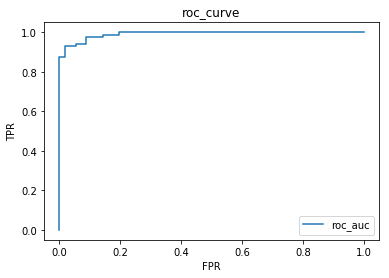

In [3]:
# 逻辑回归
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 载入数据
cancer = load_breast_cancer()

# 样本特征
x = cancer.data

# 样本标签
y = cancer.target

# 训练集、测试集划分
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2)

# 模型
lr = LogisticRegression(class_weight='balanced')

# 模型训练
lr.fit(x_train, y_train)

# 预测
y_pred = lr.predict(x_test)

# 模型评估、精度
print('accuracy: ', accuracy_score(y_test, y_pred))

# 模型评估、roc_auc_score
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))

# roc曲线
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(x_test)[:, 1])

# 画图
plt.plot(fpr, tpr, label='roc_auc')
plt.title('roc_curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()